In [3]:
import pandas as pd

# Load the data from the uploaded CSV file
wage_data = pd.read_csv('/content/sample_data/Wage.csv')

# Display the first few rows of the dataframe and the column information
wage_data.head(), wage_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


(   year  age            maritl      race        education              region  \
 0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
 1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
 2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
 3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
 4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   
 
          jobclass          health health_ins   logwage        wage  
 0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
 1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
 2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
 3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
 4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  ,
 None)

<ipython-input-4-52b1eab9a6fb>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-4-52b1eab9a6fb>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


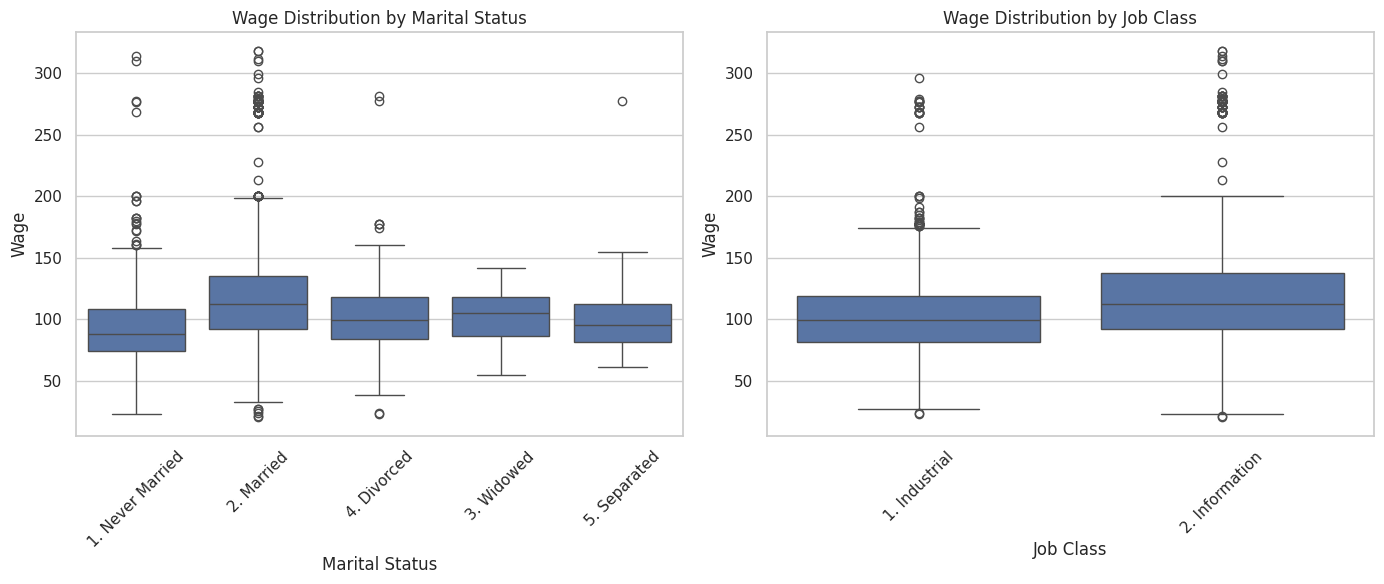

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to plot two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for marital status vs. wage
sns.boxplot(ax=axes[0], x='maritl', y='wage', data=wage_data)
axes[0].set_title('Wage Distribution by Marital Status')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Wage')

# Plot for job class vs. wage
sns.boxplot(ax=axes[1], x='jobclass', y='wage', data=wage_data)
axes[1].set_title('Wage Distribution by Job Class')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_xlabel('Job Class')
axes[1].set_ylabel('Wage')

# Display the plots
plt.tight_layout()
plt.show()


The plots reveal some interesting trends:

Wage Distribution by Marital Status: Married individuals tend to have higher wages compared to those who have never been married, are divorced, or separated. This suggests a potential influence of marital status on wage levels.

Wage Distribution by Job Class: There is a notable difference in wage distribution between industrial and information job classes, with the information sector generally offering higher wages.

To further analyze these relationships using non-linear fitting techniques, we can fit models like polynomial regressions or splines to see how wage varies with age across different marital statuses and job classes. This approach allows us to capture more complex patterns in the data.

Let's proceed by fitting a polynomial regression to visualize how wage changes with age within each marital status group, and similarly for job class.

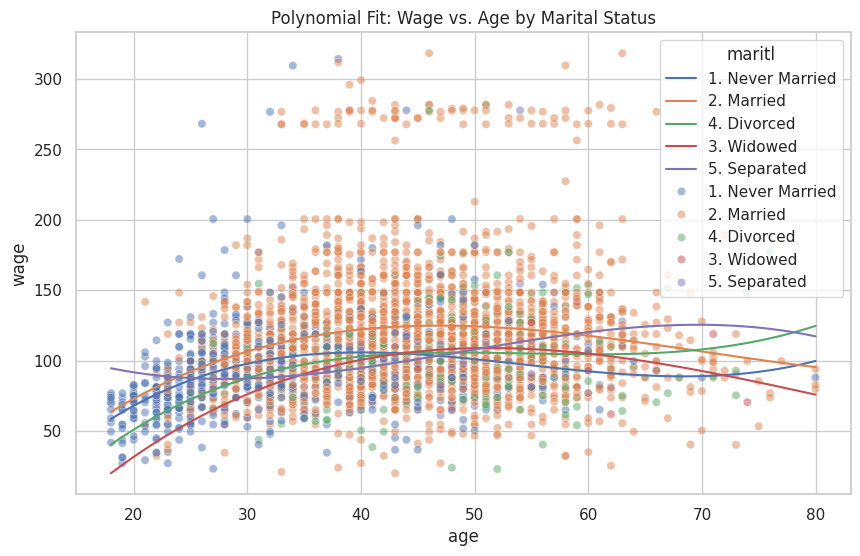

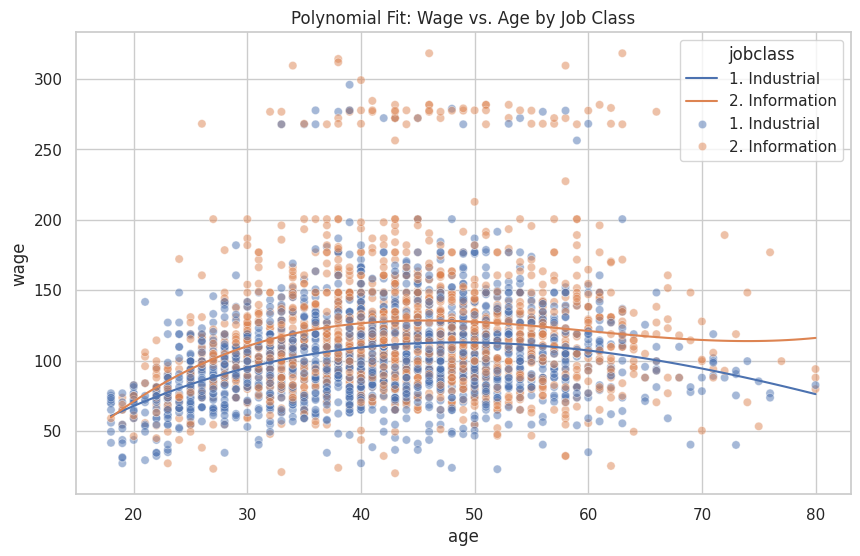

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for polynomial fitting
def prepare_data(df, x_var, y_var, group_var):
    unique_groups = df[group_var].unique()
    models = {}
    for group in unique_groups:
        # Filter data by group
        group_data = df[df[group_var] == group]
        # Fit polynomial regression
        poly = PolynomialFeatures(degree=3)
        X_poly = poly.fit_transform(group_data[x_var].values.reshape(-1, 1))
        model = LinearRegression().fit(X_poly, group_data[y_var])
        models[group] = (model, poly)
    return models

# Function to plot polynomial fits
def plot_polynomial_fits(df, x_var, y_var, group_var, models, title):
    plt.figure(figsize=(10, 6))
    for group, (model, poly) in models.items():
        # Generate predictions
        X_fit = np.linspace(df[x_var].min(), df[x_var].max(), 100).reshape(-1, 1)
        y_fit = model.predict(poly.transform(X_fit))
        # Plot
        plt.plot(X_fit, y_fit, label=group)
    # Plot actual data points as scatter plot
    sns.scatterplot(x=x_var, y=y_var, hue=group_var, data=df, alpha=0.5)
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=group_var)
    plt.show()

# Prepare models for marital status and age
models_maritl = prepare_data(wage_data, 'age', 'wage', 'maritl')
plot_polynomial_fits(wage_data, 'age', 'wage', 'maritl', models_maritl, 'Polynomial Fit: Wage vs. Age by Marital Status')

# Prepare models for job class and age
models_jobclass = prepare_data(wage_data, 'age', 'wage', 'jobclass')
plot_polynomial_fits(wage_data, 'age', 'wage', 'jobclass', models_jobclass, 'Polynomial Fit: Wage vs. Age by Job Class')


The polynomial fits provide a more detailed look into how wage varies with age, segmented by marital status and job class:

1.Wage vs. Age by Marital Status:
Generally, wages increase with age for all marital status groups, but the rate and the shape of the increase vary.
Married individuals show a more pronounced increase in wage as they age, suggesting that both age and marital status are influential factors in wage determination.

2.Wage vs. Age by Job Class:
There are distinct patterns between the industrial and information sectors. Individuals in the information sector generally start with higher wages and experience a steeper wage increase with age compared to those in the industrial sector.
The polynomial fit for the information sector shows a noticeable increase, particularly as workers approach mid-career, suggesting that experience might yield more significant wage benefits in this sector.

Summary of Findings:
Marital Status: Married individuals tend to earn higher wages, which increase more substantially with age compared to other groups. This could be due to factors such as stability or dual-income advantages.
Job Class: Workers in the information sector not only start with higher wages but also benefit from a more substantial increase over their career. This indicates that technological skills and experience are highly valued and possibly better compensated over time in the job market.
These insights could be used for further detailed analysis on how other factors like education and health impact wages, or to develop targeted wage improvement strategies within organizations or policy frameworks